24.	Создайте процедуру, изменяющую преподавателя у данной дисциплины. Входные параметры – id нового преподавателя, название дисциплины).

In [ ]:
CREATE OR REPLACE PROCEDURE update_professor_for_field(
    p_professor_id INTEGER,
    p_field_name CHARACTER VARYING
)
LANGUAGE SQL
AS $$
    -- Удаляем старые связи для всех field_id с указанным field_name
    DELETE FROM public.field_professors
    WHERE field_id IN (
        SELECT field_id 
        FROM public.fields 
        WHERE field_name = p_field_name
    );

    -- Добавляем новые связи с новым professor_id для всех field_id
    INSERT INTO public.field_professors (field_id, professor_id)
    SELECT field_id, p_professor_id
    FROM public.fields
    WHERE field_name = p_field_name;
$$;

Проверяем изначального преподавателя

In [ ]:
SELECT fp.field_id, fp.professor_id, f.field_name
FROM public.field_professors fp
JOIN public.fields f ON fp.field_id = f.field_id
WHERE f.field_name = 'Информатика';

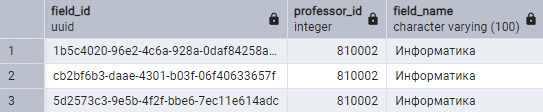

Меняем преподавателя для field

In [ ]:
CALL update_professor_for_field(p_professor_id => 810001, p_field_name => 'Информатика');

Проверяем преподавателя для field

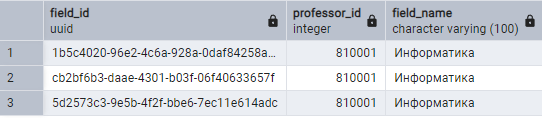